### Comments on the color remappings:

That main issue with both of the color mappings is the loss of detail with respect to the original image. This is more egregious in the second mapping where the user indicates the colors which the oringinal image should be mapped to as there is no guarantee that the colors chosen have any relationship to the colors present in the original image. In the case of the mapping using k-means clustering, the colors chosen will at the very least be some sort of average which minimizes distance to the other colors. The k-means method also contains the faults of the k-means algorithm. That is, it uses Euclidean distance, and all of the clusters tend towards the same size which may not be correct. In this vein, it might be more optimal to have 1 color that encompasses most of the picture, while retaining some level of detail in a few particular colors that dominate the main subject of the image.   

Copy of starter notebook functions:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as Image

# we won't use these packages directly, but the function that picks colors will
import scipy
import scipy.misc
import scipy.cluster

# If you haven't yet, you may need to install scipy
#!conda install -c anaconda scipy


# NOTE: I am not expecting you to know how to write these on your own!
def quantizetopalette(silf, palette, dither=False):
    """Convert an RGB or L mode image to use a given P image's palette."""
    # refs:
    # [1] https://stackoverflow.com/questions/29433243/convert-image-to-specific-palette-using-pil-without-dithering

    silf.load()

    # use palette from reference image
    palette.load()
    if palette.mode != "P":
        raise ValueError("bad mode for palette image")
    if silf.mode != "RGB" and silf.mode != "L":
        raise ValueError(
            "only RGB or L mode images can be quantized to a palette"
            )
    im = silf.im.convert("P", 1 if dither else 0, palette.im)
    # the 0 above means turn OFF dithering

    # Later versions of Pillow (4.x) rename _makeself to _new
    try:
        return silf._new(im)
    except AttributeError:
        return silf._makeself(im)


def convert_image(image, ncolors = 8):
    # refs:
    # [1]: https://stackoverflow.com/questions/3241929/python-find-dominant-most-common-color-in-an-image
    image = image.convert('RGB') # can't use alpha channel
    NUM_CLUSTERS = ncolors # unnecessary re-naming
    
    ar = np.array(image) # to data
    
    shape = ar.shape
    ar = ar.reshape(np.product(shape[:2]), shape[2]).astype(float)

    print('finding ' + str(ncolors) + ' most common colors.  Note, if "ncolors" is large, this can take a while...')
    codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
    print('Done finding colors! cluster centres in RGB:\n', codes)

    vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
    counts, bins = np.histogram(vecs, len(codes))    # count occurrences
    
    # into a 256 palette, integer types
    reds = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,0])).astype('int')
    greens = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,1])).astype('int')
    blues = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,2])).astype('int')

    # palette formatting:
    myPalette = []
    for i in range(256):
        myPalette.extend( (reds[i],greens[i],blues[i]))
        
    palimage = Image.new('P', (16, 16)) # placeholder image
    palimage.putpalette(myPalette)
    newimage = quantizetopalette(image, palimage, dither=False)
    newimage = newimage.convert('RGB')
    return newimage, codes

# similar to above, but allows you to import your own RGB sequence
def convert_image_specific(image, colors = [ [255, 255, 255], [255, 0, 0], [0,0,255], [0, 0, 0] ]):
    image = image.convert('RGB') # can't use alpha channel
    NUM_CLUSTERS = len(colors) # unnecessary re-naming
    codes = np.array(colors) # unnecessary renaming
    
    # into a 256 palette, integer types
    reds = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,0])).astype('int')
    greens = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,1])).astype('int')
    blues = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,2])).astype('int')

    # palette formatting:
    myPalette = []
    for i in range(256):
        myPalette.extend( (reds[i],greens[i],blues[i]))
        
    palimage = Image.new('P', (16, 16)) # placeholder image
    palimage.putpalette(myPalette)
    newimage = quantizetopalette(image, palimage, dither=False)
    newimage = newimage.convert('RGB')
    return newimage, codes

In [2]:
path_im1 = r'C:\Users\pranav\Desktop\Work\IS 445\Blitzcrank_0.jpg'
path_im2 = r'C:\Users\pranav\Desktop\Work\IS 445\Nunu_0.jpg'
path_im3 = r'C:\Users\pranav\Desktop\Work\IS 445\Senna_0.jpg'

In [3]:
im1 = Image.open(path_im1)
im2 = Image.open(path_im2)
im3 = Image.open(path_im3)

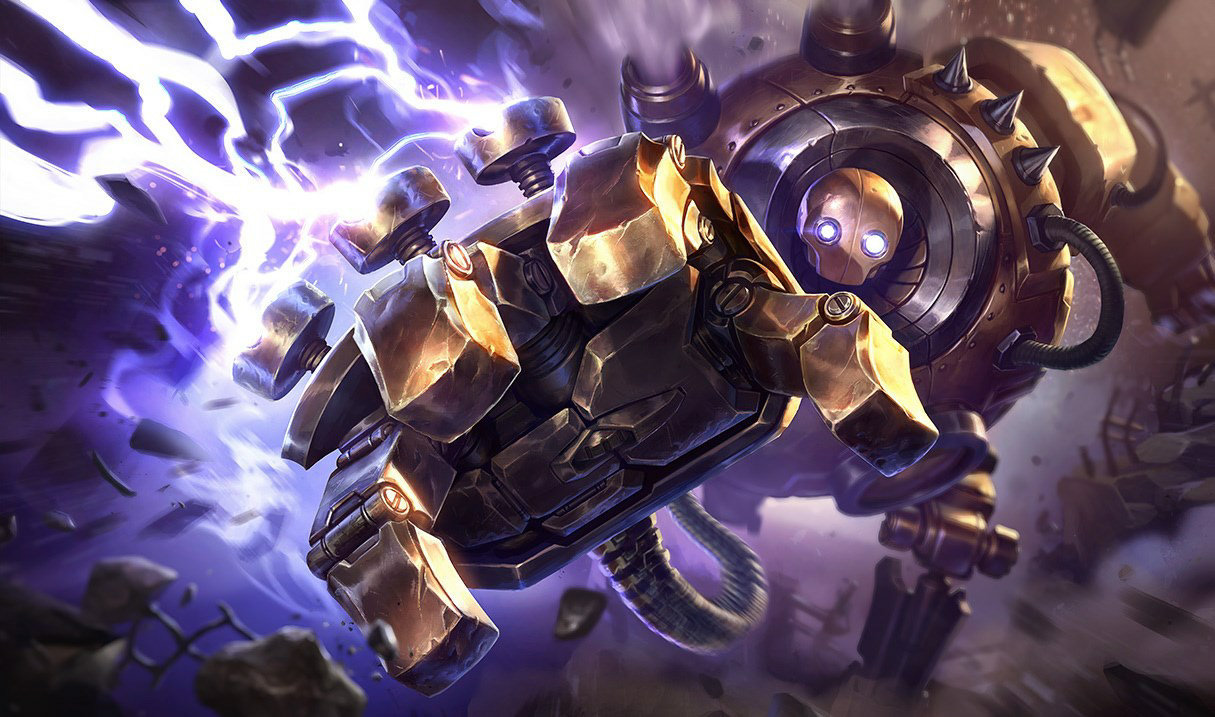

In [4]:
im1

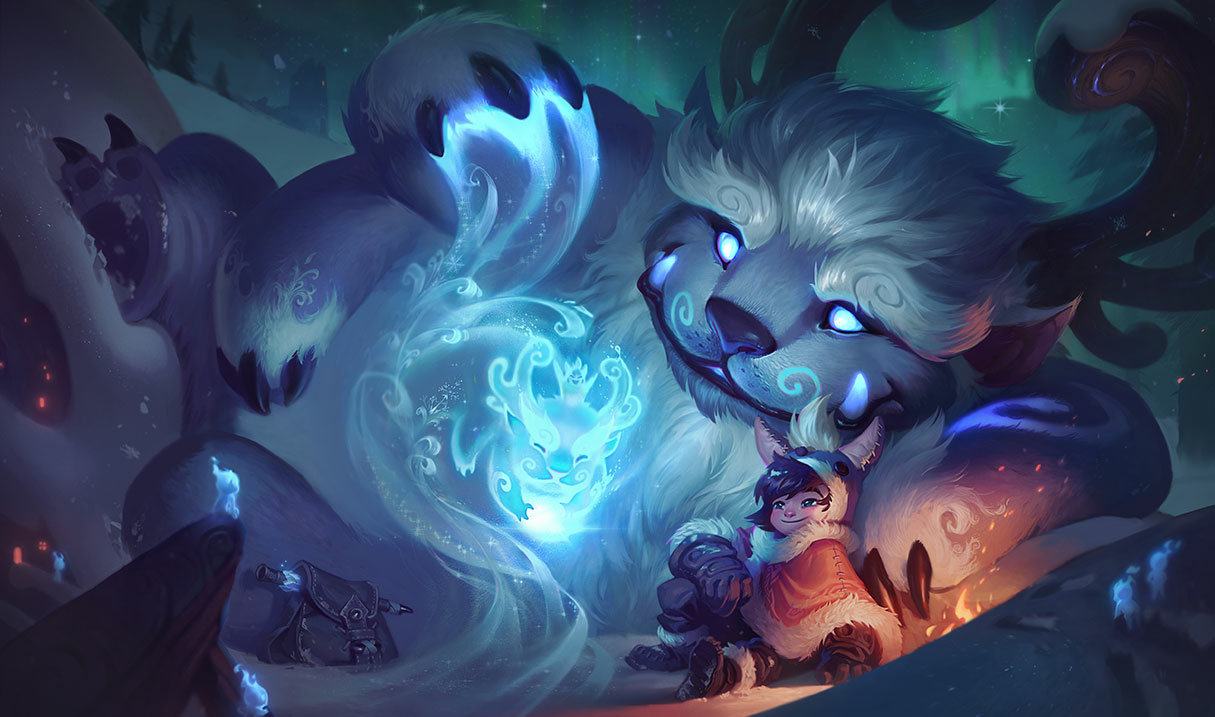

In [5]:
im2

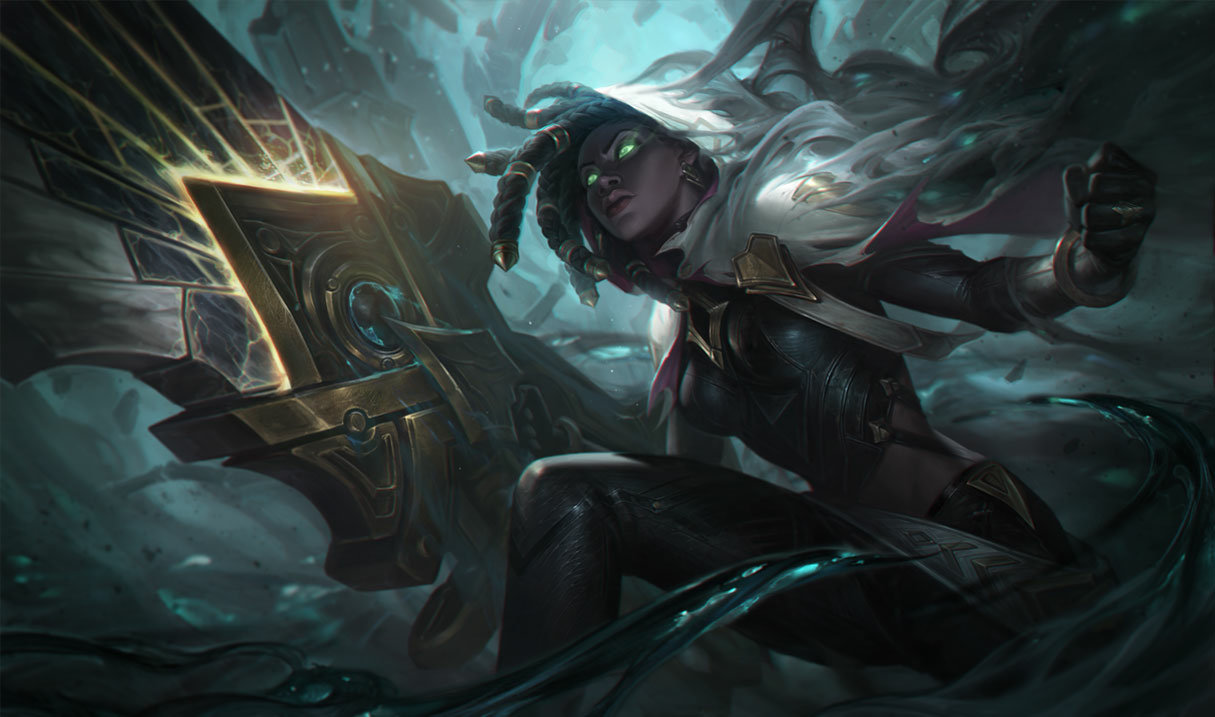

In [6]:
im3

In [7]:
new_im1, new_rgbs1 = convert_image(im1, ncolors = 10)
new_im2, new_rgbs2 = convert_image(im2, ncolors = 10)
new_im3, new_rgbs3 = convert_image(im3, ncolors = 10)

finding 10 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[112.30033089  81.39390633  82.96648363]
 [ 89.78403877  73.52457474 135.05261982]
 [247.07801838 245.05278193 246.18290138]
 [ 49.92323044  32.75354018  52.84552919]
 [ 27.8123975   16.99098933  29.38423409]
 [123.51017211 108.11484149 206.64801236]
 [184.58677012 173.11357804 236.22441062]
 [ 69.71796044  51.09478998  77.78265867]
 [152.06570298 123.86145473 133.67590302]
 [235.9891079  205.55576075 151.84894283]]
finding 10 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[195.4225953  135.88392066 120.55618351]
 [ 52.23498026  77.07193959 109.33677832]
 [140.45041578  72.59978769  79.7743719 ]
 [ 47.14809211  57.33686647  87.20694692]
 [ 63.62682313 100.32946952 140.06131002]
 [139.40110979 226.30859427 244.01205575]
 [ 78.18813542 131.60077147 170.09849864]
 [ 33.13068949  42.01

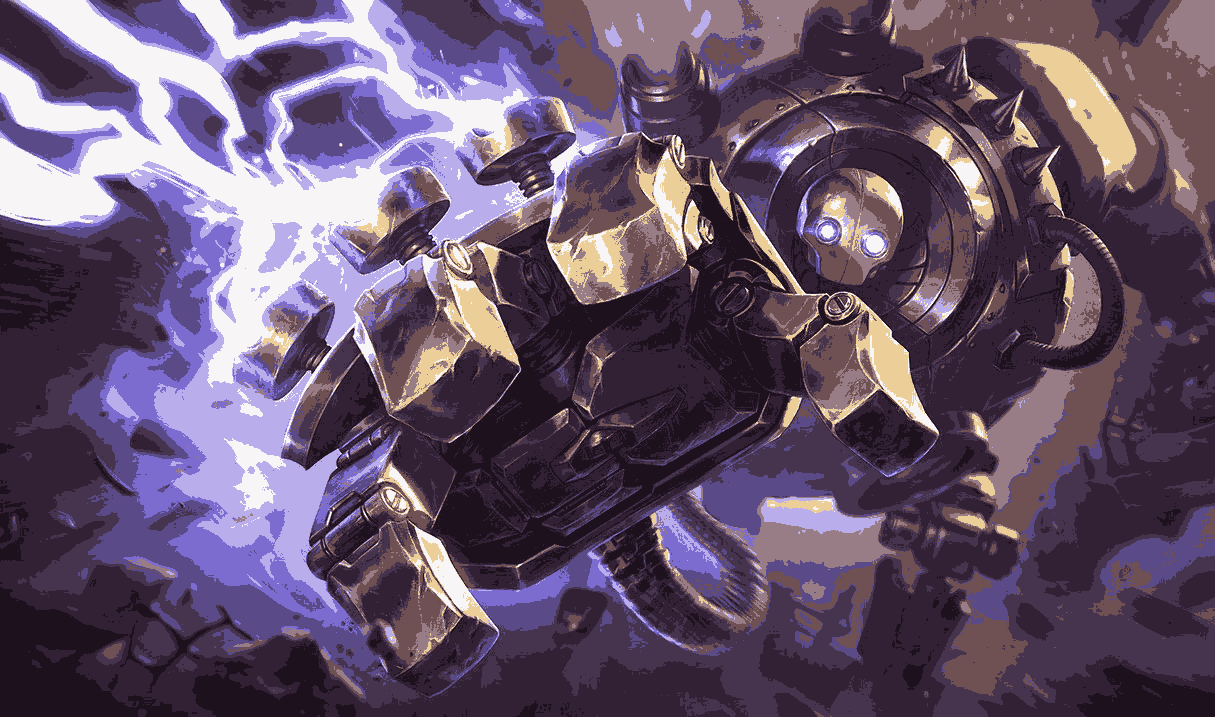

In [8]:
new_im1

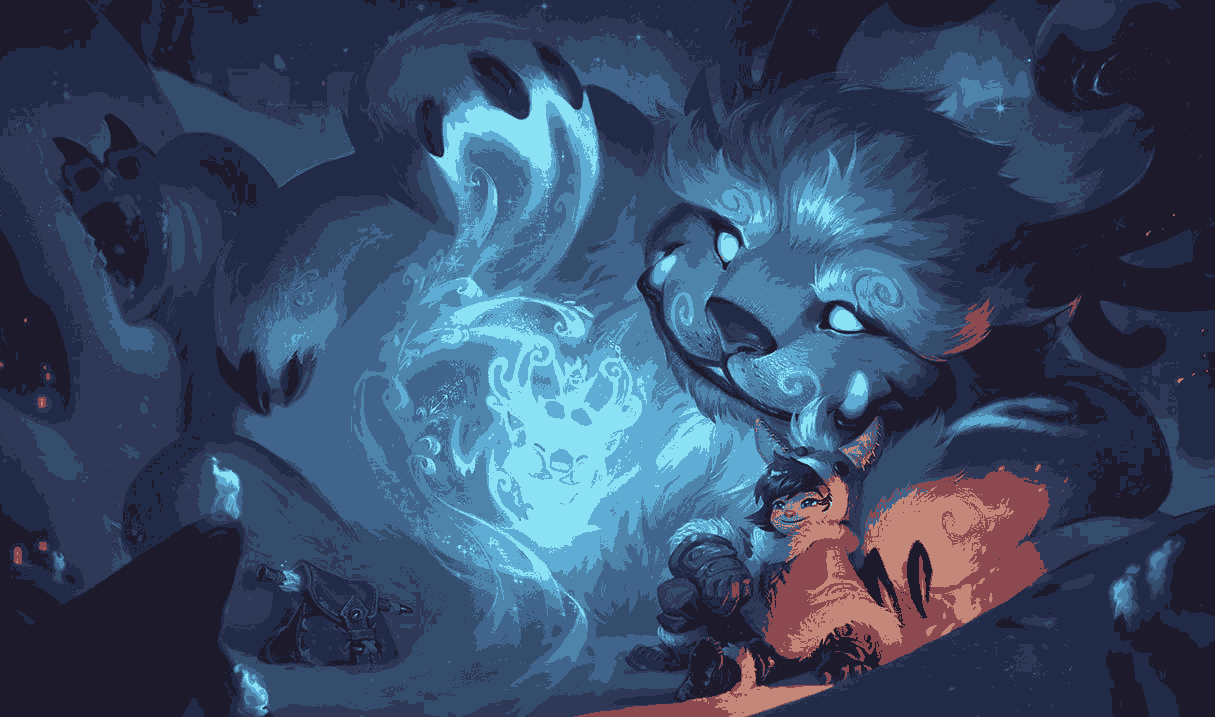

In [9]:
new_im2

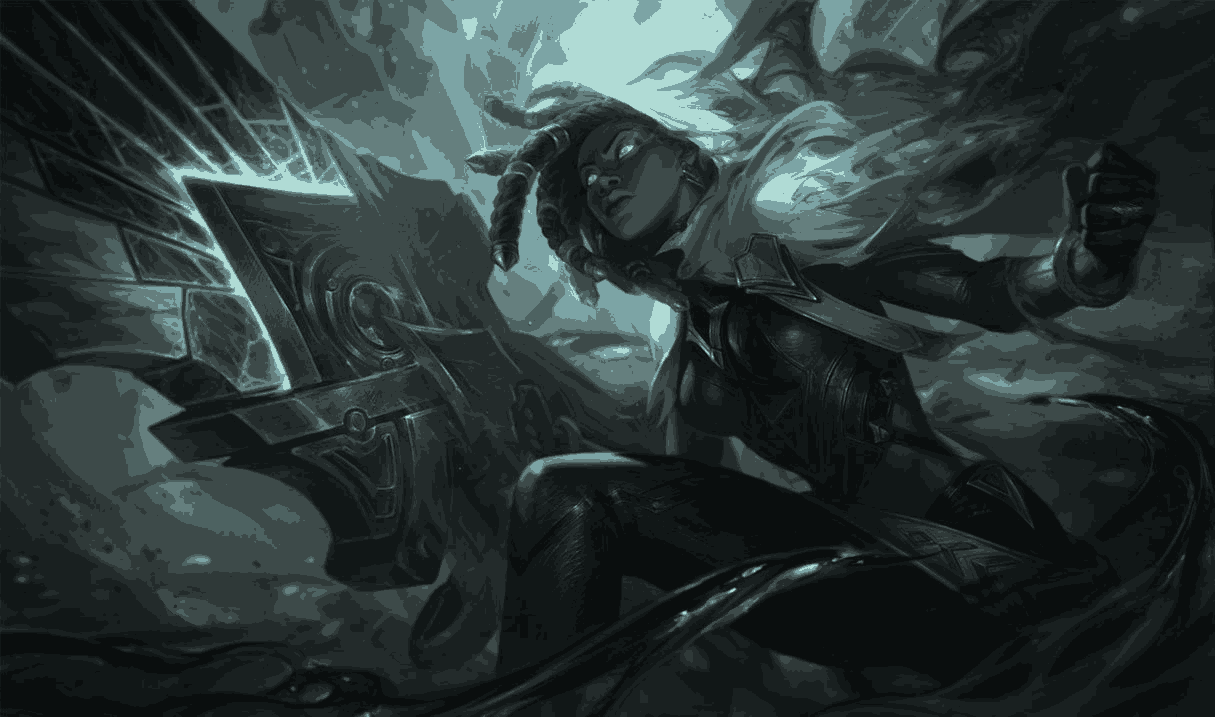

In [10]:
new_im3

In [11]:
im_data1 = np.array(new_im1)
im_data2 = np.array(new_im2)
im_data3 = np.array(new_im3)

In [12]:
im1_rgb = np.unique(im_data1.reshape(-1,im_data1.shape[2]), axis = 0)
im2_rgb = np.unique(im_data2.reshape(-1,im_data2.shape[2]), axis = 0)
im3_rgb = np.unique(im_data3.reshape(-1,im_data3.shape[2]), axis = 0)

Slightly modified code from class below

In [13]:
number_of_pixels_of_a_color1 = [] # number of pixels of a particular color
color_labels1 = [] # what are the labels of our colors
color_values1 = [] # RGBA sequences
# loop and fill up our arrays
for icolor, rgba in enumerate(im1_rgb):
    #print(icolor, rgba)
    reds_mask = im_data1[:,:,0] == rgba[0] # [all of the y pixels, all of the x pixels, 0th RGBA = R]
    green_mask = im_data1[:,:,1] == rgba[1] # [all of the y pixels, all of the x pixels, 1st RGBA = G]
    blue_mask = im_data1[:,:,2] == rgba[2] # [all of the y pixels, all of the x pixels, 2nd RGBA = B]
    
    pixel_mask = reds_mask & green_mask & blue_mask
#     print(pixel_mask)
#     print(im_data1[pixel_mask])
    # count all the pixels of a particular color
    npixels = len(im_data1[pixel_mask])
    
    # store number of pixels in this rgba combo
    number_of_pixels_of_a_color1.append(npixels)
    # naming colors
    color_labels1.append("C#" + str(icolor))
    # color values
    color_values1.append(rgba/255) # just for matplotlib color stuff -> converting from 0->255 to 0->1.0

In [14]:
number_of_pixels_of_a_color2 = [] # number of pixels of a particular color
color_labels2 = [] # what are the labels of our colors
color_values2 = [] # RGBA sequences
# loop and fill up our arrays
for icolor, rgba in enumerate(im2_rgb):
    #print(icolor, rgba)
    reds_mask = im_data2[:,:,0] == rgba[0] # [all of the y pixels, all of the x pixels, 0th RGBA = R]
    green_mask = im_data2[:,:,1] == rgba[1] # [all of the y pixels, all of the x pixels, 1st RGBA = G]
    blue_mask = im_data2[:,:,2] == rgba[2] # [all of the y pixels, all of the x pixels, 2nd RGBA = B]
    
    pixel_mask = reds_mask & green_mask & blue_mask
#     print(pixel_mask)
#     print(im_data1[pixel_mask])
    # count all the pixels of a particular color
    npixels = len(im_data2[pixel_mask])
    
    # store number of pixels in this rgba combo
    number_of_pixels_of_a_color2.append(npixels)
    # naming colors
    color_labels2.append("C#" + str(icolor))
    # color values
    color_values2.append(rgba/255) # just for matplotlib color stuff -> converting from 0->255 to 0->1.0

In [15]:
number_of_pixels_of_a_color3 = [] # number of pixels of a particular color
color_labels3 = [] # what are the labels of our colors
color_values3 = [] # RGBA sequences
# loop and fill up our arrays
for icolor, rgba in enumerate(im3_rgb):
    #print(icolor, rgba)
    reds_mask = im_data3[:,:,0] == rgba[0] # [all of the y pixels, all of the x pixels, 0th RGBA = R]
    green_mask = im_data3[:,:,1] == rgba[1] # [all of the y pixels, all of the x pixels, 1st RGBA = G]
    blue_mask = im_data3[:,:,2] == rgba[2] # [all of the y pixels, all of the x pixels, 2nd RGBA = B]
    
    pixel_mask = reds_mask & green_mask & blue_mask
#     print(pixel_mask)
#     print(im_data1[pixel_mask])
    # count all the pixels of a particular color
    npixels = len(im_data3[pixel_mask])
    
    # store number of pixels in this rgba combo
    number_of_pixels_of_a_color3.append(npixels)
    # naming colors
    color_labels3.append("C#" + str(icolor))
    # color values
    color_values3.append(rgba/255) # just for matplotlib color stuff -> converting from 0->255 to 0->1.0

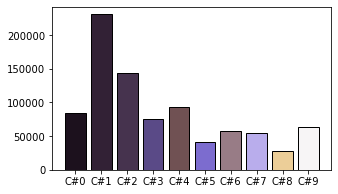

In [16]:
fig, ax = plt.subplots(figsize=(5,3))

myBarChart = ax.bar(color_labels1, number_of_pixels_of_a_color1) # creating the barchart but NOT plotting yet...

for i in range(len(myBarChart)): # looping through all of the bars of my barchart...
    myBarChart[i].set_color(color_values1[i]) # setting the color of the ith barchart to the list of colors
    myBarChart[i].set_edgecolor('black')

plt.show()

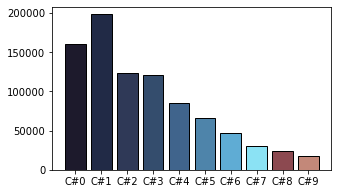

In [17]:
fig, ax = plt.subplots(figsize=(5,3))

myBarChart = ax.bar(color_labels1, number_of_pixels_of_a_color2) # creating the barchart but NOT plotting yet...

for i in range(len(myBarChart)): # looping through all of the bars of my barchart...
    myBarChart[i].set_color(color_values2[i]) # setting the color of the ith barchart to the list of colors
    myBarChart[i].set_edgecolor('black')

plt.show()

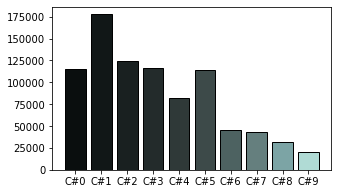

In [18]:
fig, ax = plt.subplots(figsize=(5,3))

myBarChart = ax.bar(color_labels1, number_of_pixels_of_a_color3) # creating the barchart but NOT plotting yet...

for i in range(len(myBarChart)): # looping through all of the bars of my barchart...
    myBarChart[i].set_color(color_values3[i]) # setting the color of the ith barchart to the list of colors
    myBarChart[i].set_edgecolor('black')

plt.show()

### Writeup:

I chose three random images of playable characters from the video game "League of Legends." Of these three I prefer in order the second, first, and then third images. In plotting the 10 most common colors for each of these, we can find that there are  distinct differences in the colors used in each of the pictures. In terms of similarities, the second and third pictures both have 1 dominant color in different shades. For the second image we see various shades of blue, and for the third image we see various shades of a teal/green color. In both of these cases, as the shade gets darker the number of pixels tends to increase. The first image on the otherhand seems to be split into mainly purple and brown shades. In addition, the first image is dominated by pixels with the dark purple color, but the rest of the colors are close to equally distributed. 

All three images are fairly obviously different from each other, and this is confirmed by the lack of shared colors apart from black/a very dark shade of the dominant color. The first two images have more contrast between warm and cold colors, or at least some part of the image which is dominated by a warm color. This is part of what makes me like them more. The third image seems to convey a somewhat drab tone while the contrast in the first two gives the images a different feel.

I think its important to note that just comparing the colors throws away the content of the images in terms of the action currently taking place. All of the images are trying to present some sort of action, and this content simply cannot be reflected in the 10 most common colors. Also, since all of the images are digitally produced, it is possible that a large amount of thought went into the original color choices, and this may be reflected in that pattern of one color with many shades in the second two images. These images do not, and are not meant to look natural, and this may also have some effect on the color choice. 